In [1]:
import torch

from scalarize.utils.scalarization_functions import LengthScalarization
from scalarize.utils.scalarization_parameters import UnitVector

import matplotlib
import matplotlib.lines as mlines
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt

matplotlib.rcParams["text.usetex"] = True
matplotlib.rcParams["mathtext.fontset"] = "stix"
matplotlib.rcParams["font.family"] = "STIXGeneral"
matplotlib.rcParams[
    "text.latex.preamble"
] = r"\usepackage{amsmath}\usepackage{amssymb}\usepackage{color}"

In [2]:
tkwargs = {"dtype": torch.double, "device": "cpu"}
torch.manual_seed(0)

# Define the red Pareto front.
nadir = 0.0 * torch.ones(1, 2, **tkwargs)

pf1 = torch.tensor(
    [
        [0.3, 0.9],
        [0.5, 0.7],
        [0.6, 0.6],
        [0.7, 0.4],
        [0.95, 0.2],
    ],
    **tkwargs
)

weak_pf1 = torch.row_stack(
    [
        torch.tensor([nadir[0, 0], pf1[0, 1]], **tkwargs),
        pf1,
        torch.tensor([pf1[-1, 0], nadir[0, 1]], **tkwargs),
    ]
)

# Define the blue Pareto front.
pf2 = torch.tensor(
    [
        [0.45, 0.8],
        [0.75, 0.5],
        [0.85, 0.3],
    ],
    **tkwargs
)

weak_pf2 = torch.row_stack(
    [
        torch.tensor([nadir[0, 0], pf2[0, 1]], **tkwargs),
        pf2,
        torch.tensor([pf2[-1, 0], nadir[0, 1]], **tkwargs),
    ]
)

# Symmetric difference.
weak_pf_up = torch.tensor(
    [
        [0.00, 0.9],
        [0.05, 0.9],
        [0.10, 0.9],
        [0.15, 0.9],
        [0.20, 0.9],
        [0.25, 0.9],
        [0.30, 0.9],
        [0.35, 0.8],
        [0.40, 0.8],
        [0.45, 0.8],
        [0.50, 0.7],
        [0.55, 0.6],
        [0.60, 0.6],
        [0.65, 0.5],
        [0.70, 0.5],
        [0.75, 0.5],
        [0.80, 0.3],
        [0.85, 0.3],
        [0.90, 0.2],
        [0.95, 0.2],
    ],
    **tkwargs
)

weak_pf_lo = torch.tensor(
    [
        [0.00, 0.8],
        [0.05, 0.8],
        [0.10, 0.8],
        [0.15, 0.8],
        [0.20, 0.8],
        [0.25, 0.8],
        [0.30, 0.8],
        [0.35, 0.7],
        [0.40, 0.7],
        [0.45, 0.7],
        [0.50, 0.5],
        [0.55, 0.5],
        [0.60, 0.5],
        [0.65, 0.4],
        [0.70, 0.4],
        [0.75, 0.2],
        [0.80, 0.2],
        [0.85, 0.2],
        [0.90, 0.0],
        [0.95, 0.0],
    ],
    **tkwargs
)

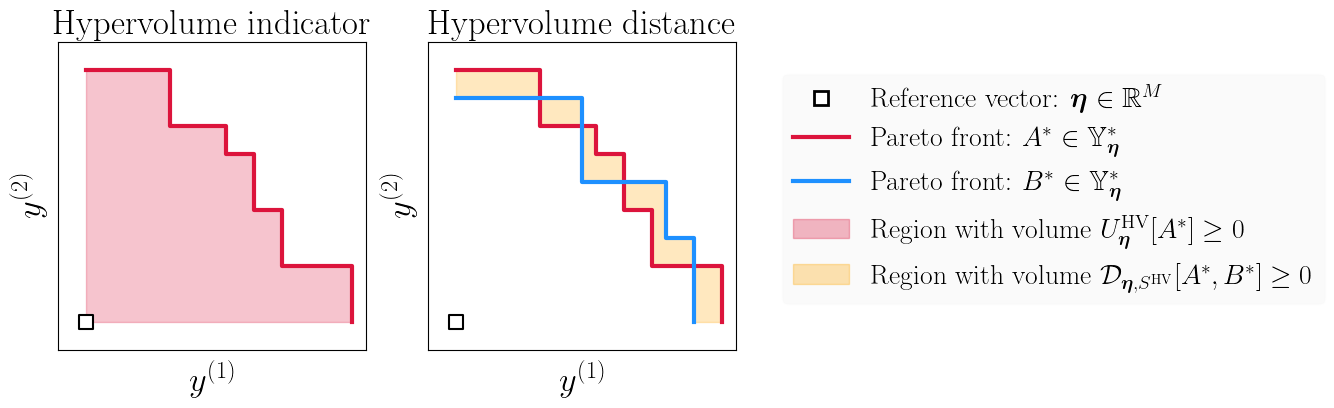

In [3]:
fig, axes = plt.subplots(1, 2, figsize=(8.75, 4))

for i in range(2):
    ax = plt.subplot(1, 2, i + 1)

    ax.scatter(
        nadir[:, 0],
        nadir[:, 1],
        color="w",
        marker="s",
        linestyle="None",
        s=100,
        edgecolors="k",
        linewidth=1.5,
        zorder=5,
    )
    ax.set_xlim([-0.1, 1])
    ax.set_ylim([-0.1, 1])
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xlabel(r"$y^{(1)}$", fontsize=25)
    ax.set_ylabel(r"$y^{(2)}$", fontsize=25)
########################################################################################
# Hypervolume indicator.
ax = plt.subplot(1, 2, 1)
ax.step(
    weak_pf1[:, 0],
    weak_pf1[:, 1],
    color="crimson",
    linestyle="-",
    alpha=1,
    linewidth=3,
    zorder=4,
)
low_line = nadir[0, 1] * torch.ones(len(weak_pf1), **tkwargs)
ax.fill_between(
    weak_pf1[:, 0], low_line, weak_pf1[:, 1], color="crimson", alpha=0.25, step="pre"
)
ax.set_title("Hypervolume indicator", fontsize=25)
########################################################################################
# Hypervolume distance.
ax = plt.subplot(1, 2, 2)
ax.step(
    weak_pf1[:, 0],
    weak_pf1[:, 1],
    color="crimson",
    linestyle="-",
    alpha=1,
    linewidth=3,
    zorder=4,
)
ax.step(
    weak_pf2[:, 0],
    weak_pf2[:, 1],
    color="dodgerblue",
    linestyle="-",
    alpha=1,
    linewidth=3,
    zorder=4,
)
ax.fill_between(
    weak_pf_up[:, 0],
    weak_pf_lo[:, 1],
    weak_pf_up[:, 1],
    color="orange",
    alpha=0.25,
    step="pre",
)

ax.set_title("Hypervolume distance", fontsize=25)
########################################################################################
# Legend.
white_square = mlines.Line2D(
    [],
    [],
    color="w",
    marker="s",
    linestyle="None",
    markersize=10,
    markeredgecolor="k",
    markeredgewidth=2,
    label=r"Reference vector: $\boldsymbol{\eta} \in \mathbb{R}^M$",
)

red_line = mlines.Line2D(
    [],
    [],
    color="crimson",
    linestyle="-",
    linewidth=3,
    markersize=20,
    markeredgecolor="k",
    markeredgewidth=2,
    label=r"Pareto front: $A^* \in \mathbb{Y}^*_{\boldsymbol{\eta}}$",
)

blue_line = mlines.Line2D(
    [],
    [],
    color="dodgerblue",
    linestyle="-",
    linewidth=3,
    markersize=20,
    markeredgecolor="k",
    markeredgewidth=2,
    label=r"Pareto front: $B^* \in \mathbb{Y}^*_{\boldsymbol{\eta}}$",
)

red_patch = mpatches.Patch(
    color="crimson",
    label=r"Region with volume $U_{\boldsymbol{\eta}}^{\text{HV}}[A^*] \geq 0$",
    alpha=0.3,
)

orange_patch = mpatches.Patch(
    color="orange",
    label=r"Region with volume $\mathcal{D}_{\boldsymbol{\eta}, S^{\text{HV}}}[A^*, B^*] \geq 0$",
    alpha=0.3,
)

axes[1].legend(
    handles=[white_square, red_line, blue_line, red_patch, orange_patch],
    ncol=1,
    fontsize=20,
    loc=(1.15, 0.15),
    facecolor="k",
    framealpha=0.02,
)

plt.show()